# Objective
In this competition, we are challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to **<span class="mark">predict natural log of the total revenue per unique user</span>**

# Data Format 
- Each row - 1 visit to the store
- <span class="mark">totals.transactionRevenue - Contains the revenue information we are trying to predict</span> **(exists only for the training data)**


**NOTES**:
- Not all rows in test.csv will correspond to a row in the submission, but all unique fullVisitorIds will correspond to a row in the submission
- Due to the formatting of **fullVisitorId you must load the Id's as strings** in order for all Id's to be properly unique!
- Be wary of loading this data in programs like Excel that might also truncate or alter the IDs

In [1]:
import os
import json
from pandas.io.json import json_normalize

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

from sklearn.preprocessing import LabelEncoder

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

# Load Data (Flattened)

In [3]:
df_train = pd.read_csv(r'C:\Users\Admond\Desktop\Data Science\Kaggle\Google Analytics Customer Revenue Prediction\data\train-flattened.csv',
                       dtype={'fullVisitorId': 'str'})  # MUST change the fullVisitorId to string format (REQUIRED!)
df_test = pd.read_csv(r'C:\Users\Admond\Desktop\Data Science\Kaggle\Google Analytics Customer Revenue Prediction\data\test-flattened.csv',
                       dtype={'fullVisitorId': 'str'})

In [4]:
df_train.shape

(903653, 55)

In [5]:
df_test.shape

(804684, 53)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device.browser                                       903653 non-null object
device.browserSize                                   903653 non-null object
device.browserVersion                                903653 non-null object
device.deviceCategory                                9036

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 53 columns):
channelGrouping                                      804684 non-null object
date                                                 804684 non-null int64
fullVisitorId                                        804684 non-null object
sessionId                                            804684 non-null object
socialEngagementType                                 804684 non-null object
visitId                                              804684 non-null int64
visitNumber                                          804684 non-null int64
visitStartTime                                       804684 non-null int64
device.browser                                       804684 non-null object
device.browserSize                                   804684 non-null object
device.browserVersion                                804684 non-null object
device.deviceCategory                                8046

In [8]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo d

In [9]:
df_test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,Asia,Singapore,not available in demo dataset,not available in demo dataset,(not set),myrepublic.com.sg,not available in demo dataset,(not set),Southeast Asia,NaN,4,NaN,4.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Zaragoza,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),rima-tde.net,not available in demo dataset,Aragon,Southern Europe,NaN,5,1.0,5.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,sfr.net,not available in demo dataset,not available in demo dataset,Western Europe,NaN,7,1.0,7.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not ava

# <span class="girk"><span class="burk">Data Cleaning</span></span>
Credits:
- [SRK](https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-ga-customer-revenue)
- Kexin and Wei Hong notebook

## Check TOTAL and UNIQUE number of users and common visitors

In [10]:
print('Total users in training data: {}'.format(df_train['fullVisitorId'].shape[0])) # check out how many users in training data
print('Total users in testing data: {}\n'.format(df_test['fullVisitorId'].shape[0])) # check out how many users in testing data

print('Total unique users in training data: {}'.format(df_train['fullVisitorId'].nunique())) # check out how many unique users in training data
print('Total unique users in testing data: {}\n'.format(df_test['fullVisitorId'].nunique())) # check out how many unique users in testing data

print("Number of common visitors in train and test set : {}".format(len(set(df_train.fullVisitorId.unique()).intersection(set(df_test.fullVisitorId.unique())) )))

Total users in training data: 903653
Total users in testing data: 804684

Total unique users in training data: 714167
Total unique users in testing data: 617242

Number of common visitors in train and test set : 7679


In [11]:
# replace NaN with zero for column - totals.transactionRevenue  (only do this for training data)
df_train['totals.transactionRevenue'].fillna(0, inplace=True)

## Remove columns with constant values 

In [12]:
const_cols = [c for c in df_train.columns if df_train[c].nunique(dropna=False)==1 ]
print('Columns that have constant values are:\n')
const_cols

Columns that have constant values are:



['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

**Drop the columns with constant values to save memory and time in modeling process**

In [13]:
df_train_clean = df_train.drop(const_cols, axis=1)
df_test_clean = df_test.drop(const_cols, axis=1)

In [14]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 36 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
sessionId                                       903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null object
geoNetwork.city                                 903653 non-null object
geoNetwork.continent                       

## Check which variables are not in Testing data but in Training data

In [15]:
print('Variables not in testing data but in training data:\n\n{}'.format(set(df_train.columns)-set(df_test.columns)))

Variables not in testing data but in training data:

{'trafficSource.campaignCode', 'totals.transactionRevenue'}


**So apart from target variable (totals.transactionRevenue), there is one more variable "trafficSource.campaignCode" not present in test dataset. So we need to remove this variable while building models**
- Also we can remove the "sessionId" as it is a unique identifier of the visit

In [16]:
df_train_clean.drop(['sessionId', "trafficSource.campaignCode"], axis=1, inplace=True)
df_test_clean.drop(['sessionId'], axis=1, inplace=True)

In [17]:
df_train_clean.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google


In [18]:
# Which variable is in training data but not in testing data?
set(df_train_clean.columns)-set(df_test_clean.columns)

{'totals.transactionRevenue'}

In [19]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 34 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null object
geoNetwork.city                                 903653 non-null object
geoNetwork.continent                            903653 non-null object
geoNetwork.country                         

In [20]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 33 columns):
channelGrouping                                 804684 non-null object
date                                            804684 non-null int64
fullVisitorId                                   804684 non-null object
visitId                                         804684 non-null int64
visitNumber                                     804684 non-null int64
visitStartTime                                  804684 non-null int64
device.browser                                  804684 non-null object
device.deviceCategory                           804684 non-null object
device.isMobile                                 804684 non-null bool
device.operatingSystem                          804684 non-null object
geoNetwork.city                                 804684 non-null object
geoNetwork.continent                            804684 non-null object
geoNetwork.country                         

## Replace NaN for categorical and numerical variables
- **Convert numerical variables to float type**

In [29]:
# specify which categorical variables to replace NaN
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:    
    # Replace NaN with 'missing'
    df_train_clean[col] = df_train_clean[col].fillna('missing')
    df_test_clean[col] = df_test_clean[col].fillna('missing')

In [66]:
# specify which numerical variables to replace NaN
num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    
    # convert numerical variables to float
    # Replace NaN with 0
    df_train_clean[col] = df_train_clean[col].astype('float').fillna(0)
    df_test_clean[col] = df_test_clean[col].astype('float').fillna(0)

## Check for missing values
- Since we have already replaced all the missing values for **categorical and numerical** variables, there are no more missing values

In [31]:
df_train_clean.isnull().sum().sort_values(ascending=False)

trafficSource.source                            0
device.isMobile                                 0
geoNetwork.networkDomain                        0
geoNetwork.metro                                0
geoNetwork.country                              0
geoNetwork.continent                            0
geoNetwork.city                                 0
device.operatingSystem                          0
device.deviceCategory                           0
trafficSource.referralPath                      0
device.browser                                  0
visitStartTime                                  0
visitNumber                                     0
visitId                                         0
fullVisitorId                                   0
date                                            0
geoNetwork.region                               0
geoNetwork.subContinent                         0
totals.bounces                                  0
totals.hits                                     0


In [32]:
df_test_clean.isnull().sum().sort_values(ascending=False)

trafficSource.source                            0
geoNetwork.region                               0
date                                            0
fullVisitorId                                   0
visitId                                         0
visitNumber                                     0
visitStartTime                                  0
device.browser                                  0
device.deviceCategory                           0
device.isMobile                                 0
device.operatingSystem                          0
geoNetwork.city                                 0
geoNetwork.continent                            0
geoNetwork.country                              0
geoNetwork.metro                                0
geoNetwork.networkDomain                        0
geoNetwork.subContinent                         0
trafficSource.referralPath                      0
totals.bounces                                  0
totals.hits                                     0


In [33]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 34 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null float64
visitStartTime                                  903653 non-null float64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null object
geoNetwork.city                                 903653 non-null object
geoNetwork.continent                            903653 non-null object
geoNetwork.country                     

In [34]:
df_train_clean.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1472830385,1.0,1.472830e+09,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
1,Organic Search,20160902,377306020877927890,1472880147,1.0,1.472880e+09,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
2,Organic Search,20160902,3895546263509774583,1472865386,1.0,1.472865e+09,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
3,Organic Search,20160902,4763447161404445595,1472881213,1.0,1.472881e+09,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,google + online,organic,missing,google
4,Organic Search,20160902,27294437909732085,1472822600,2.0,1.472823e+09,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,(not provided),organic,missing,google


## Convert device.isMobile (True/False) to Binary 
- True = 1
- False = 0

In [35]:
df_train_clean['device.isMobile'] = df_train_clean['device.isMobile'].astype(int)
df_test_clean['device.isMobile'] = df_test_clean['device.isMobile'].astype(int)

In [36]:
df_train_clean['device.isMobile'].head()

0    0
1    0
2    0
3    0
4    1
Name: device.isMobile, dtype: int32

In [37]:
df_test_clean['device.isMobile'].head()

0    0
1    0
2    0
3    1
4    0
Name: device.isMobile, dtype: int32

## Check out the correlation for numerical variables 

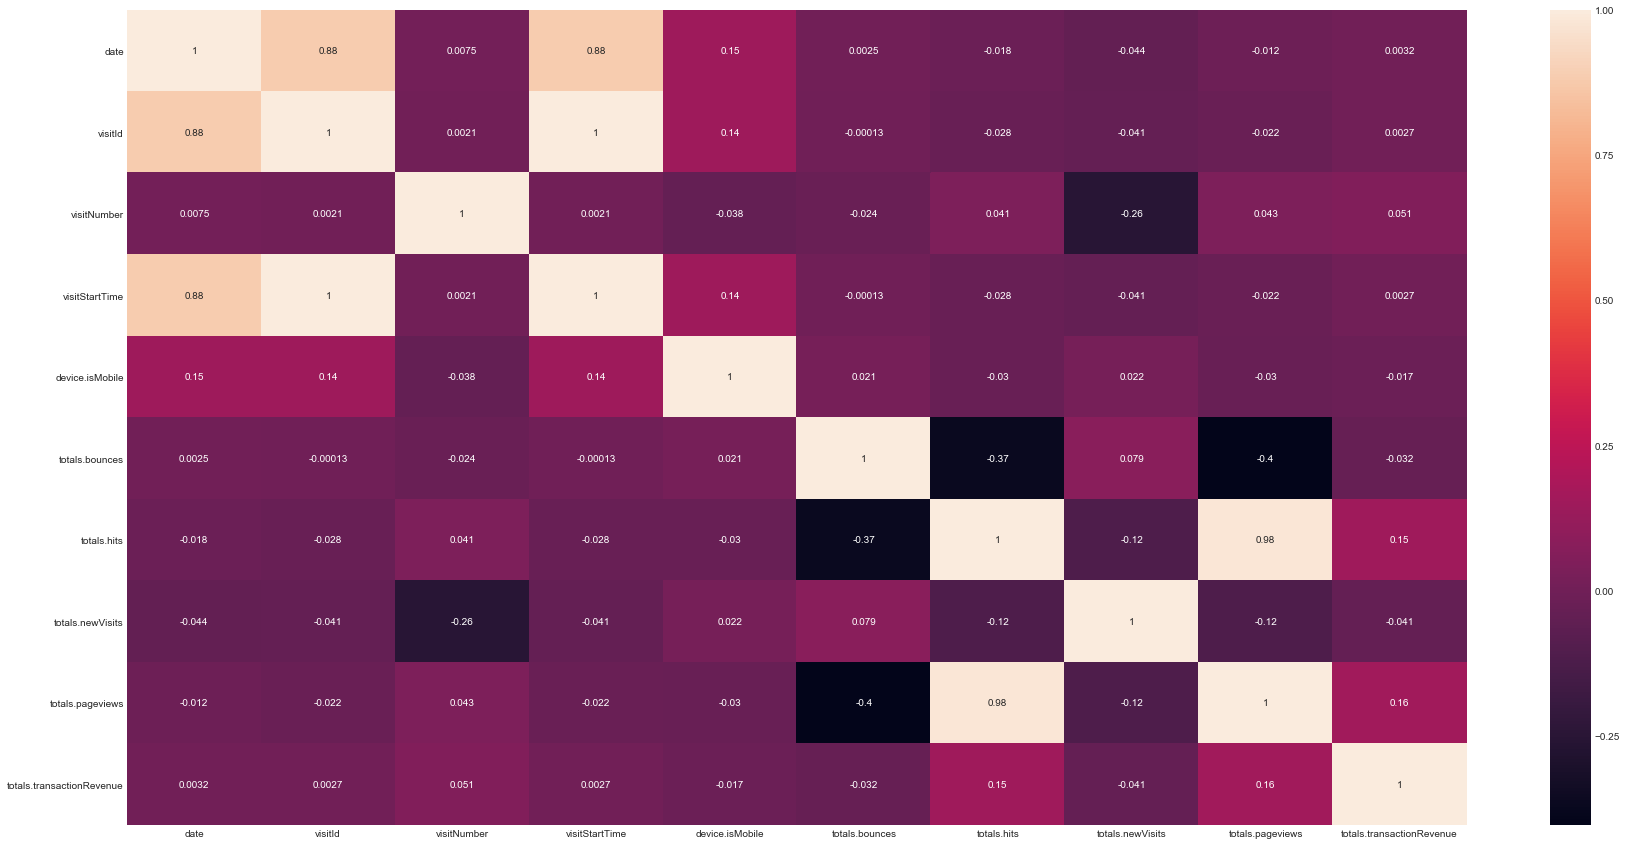

In [42]:
plt.subplots(figsize=(30,15))
sns.heatmap(df_train_clean.corr(), annot=True)
plt.show()

## Convert the column - date to datetime format

In [43]:
df_train_clean.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1472830385,1.0,1.472830e+09,Chrome,desktop,0,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
1,Organic Search,20160902,377306020877927890,1472880147,1.0,1.472880e+09,Firefox,desktop,0,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
2,Organic Search,20160902,3895546263509774583,1472865386,1.0,1.472865e+09,Chrome,desktop,0,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
3,Organic Search,20160902,4763447161404445595,1472881213,1.0,1.472881e+09,UC Browser,desktop,0,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,google + online,organic,missing,google
4,Organic Search,20160902,27294437909732085,1472822600,2.0,1.472823e+09,Chrome,mobile,1,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,(not provided),organic,missing,google


In [44]:
# change int format to string format for the column - date
df_train_clean['date'] = df_train_clean['date'].astype(str)
df_test_clean['date'] = df_test_clean['date'].astype(str)

In [266]:
# add a new column - yearmonth
df_train_clean.insert(loc=2, column='yearmonth', value=df_train_clean['date'].str.slice(start=0, stop=-2))
df_test_clean.insert(loc=2, column='yearmonth', value=df_test_clean['date'].str.slice(start=0, stop=-2))

In [45]:
df_train_clean['date'] = pd.to_datetime(df_train_clean['date'], format='%Y%m%d')
df_test_clean['date'] = pd.to_datetime(df_test_clean['date'], format='%Y%m%d')

In [46]:
df_train_clean.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1472830385,1.0,1.472830e+09,Chrome,desktop,0,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
1,Organic Search,2016-09-02,377306020877927890,1472880147,1.0,1.472880e+09,Firefox,desktop,0,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
2,Organic Search,2016-09-02,3895546263509774583,1472865386,1.0,1.472865e+09,Chrome,desktop,0,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,(not provided),organic,missing,google
3,Organic Search,2016-09-02,4763447161404445595,1472881213,1.0,1.472881e+09,UC Browser,desktop,0,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,google + online,organic,missing,google
4,Organic Search,2016-09-02,27294437909732085,1472822600,2.0,1.472823e+09,Chrome,mobile,1,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,(not provided),organic,missing,google


### Sort rows based on datetime (ascending)

In [47]:
df_train_clean = df_train_clean.sort_values(by='date', ascending=True)
df_test_clean = df_test_clean.sort_values(by='date', ascending=True)

In [48]:
df_train_clean.head(100)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
538448,Direct,2016-08-01,1492602573213666603,1470044332,1.0,1.470044e+09,Chrome,desktop,0,Macintosh,not available in demo dataset,Asia,Japan,not available in demo dataset,i3-systems.net,not available in demo dataset,Eastern Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538277,Direct,2016-08-01,7394165545362887055,1470044425,3.0,1.470044e+09,Chrome,desktop,0,Windows,Hanoi,Asia,Vietnam,(not set),unknown.unknown,Hanoi,Southeast Asia,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538278,Referral,2016-08-01,6107229716178617930,1470094529,1.0,1.470095e+09,Chrome,desktop,0,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,missing,referral,/,mall.googleplex.com
538279,Direct,2016-08-01,9459384188253198762,1470079413,1.0,1.470079e+09,Chrome,desktop,0,Windows,not available in demo dataset,Americas,Brazil,not available in demo dataset,brasiltelecom.net.br,not available in demo dataset,South America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538280,Direct,2016-08-01,4052177266351383392,1470111093,1.0,1.470111e+09,Safari,desktop,0,Macintosh,not available in demo dataset,Asia,Thailand,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538281,Direct,2016-08-01,9066503657481474837,1470116986,1.0,1.470117e+09,Chrome,desktop,0,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538282,Direct,2016-08-01,8842322787175138234,1470075625,1.0,1.470076e+09,Chrome,desktop,0,Macintosh,Palo Alto,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538283,Display,2016-08-01,5874622223792422534,1470084913,1.0,1.470085e+09,Firefox,desktop,0,Windows,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,evilmartians.net,California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,missing,cpm,missing,dfa
538284,Direct,2016-08-01,4652287826732444235,1470056313,23.0,1.470056e+09,Chrome,desktop,0,Chrome OS,not available in demo dataset,Americas,Brazil,not available in demo dataset,(not set),not available in demo dataset,South America,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
538285,Direct,2016-08-01,079785550312480399,1470103322,2.0,1.470103e+09,Safari,mobile,1,iOS,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo dataset,Northern America,1.0,1.0,0.0,1.0,0.0,missing,missing

### Add new columns - Year, Month, Day

In [49]:
# training data
df_train_clean.insert(loc=2, column='year', value=df_train_clean.date.dt.year)
df_train_clean.insert(loc=3, column='month', value=df_train_clean.date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_train_clean.insert(loc=4, column='day', value=(df_train_clean.date.dt.dayofweek)+1)

# testing data
df_test_clean.insert(loc=2, column='year', value=df_test_clean.date.dt.year)
df_test_clean.insert(loc=3, column='month', value=df_test_clean.date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_test_clean.insert(loc=4, column='day', value=(df_test_clean.date.dt.dayofweek)+1)

In [59]:
# reset index after we rearranged the rows based on date
df_train_clean.reset_index(drop=True, inplace=True)
df_test_clean.reset_index(drop=True, inplace=True)

# <span class="girk"><span class="burk">Exploratory Data Analysis (EDA)</span></span>

In [60]:
df_train_clean.head(100)

,channelGrouping,date,year,month,day,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,2016-08-01,2016,8,1,1492602573213666603,1470044332,1.0,1.470044e+09,Chrome,desktop,0,Macintosh,not available in demo dataset,Asia,Japan,not available in demo dataset,i3-systems.net,not available in demo dataset,Eastern Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
1,Direct,2016-08-01,2016,8,1,7394165545362887055,1470044425,3.0,1.470044e+09,Chrome,desktop,0,Windows,Hanoi,Asia,Vietnam,(not set),unknown.unknown,Hanoi,Southeast Asia,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
2,Referral,2016-08-01,2016,8,1,6107229716178617930,1470094529,1.0,1.470095e+09,Chrome,desktop,0,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,missing,referral,/,mall.googleplex.com
3,Direct,2016-08-01,2016,8,1,9459384188253198762,1470079413,1.0,1.470079e+09,Chrome,desktop,0,Windows,not available in demo dataset,Americas,Brazil,not available in demo dataset,brasiltelecom.net.br,not available in demo dataset,South America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
4,Direct,2016-08-01,2016,8,1,4052177266351383392,1470111093,1.0,1.470111e+09,Safari,desktop,0,Macintosh,not available in demo dataset,Asia,Thailand,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
5,Direct,2016-08-01,2016,8,1,9066503657481474837,1470116986,1.0,1.470117e+09,Chrome,desktop,0,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
6,Direct,2016-08-01,2016,8,1,8842322787175138234,1470075625,1.0,1.470076e+09,Chrome,desktop,0,Macintosh,Palo Alto,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
7,Display,2016-08-01,2016,8,1,5874622223792422534,1470084913,1.0,1.470085e+09,Firefox,desktop,0,Windows,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,evilmartians.net,California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,missing,cpm,missing,dfa
8,Direct,2016-08-01,2016,8,1,4652287826732444235,1470056313,23.0,1.470056e+09,Chrome,desktop,0,Chrome OS,not available in demo dataset,Americas,Brazil,not available in demo dataset,(not set),not available in demo dataset,South America,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
9,Direct,2016-08-01,2016,8,1,079785550312480399,1470103322,2.0,1.470103e+09,Safari,mobile,1,iOS,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo datas

In [63]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 37 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null datetime64[ns]
year                                            903653 non-null int64
month                                           903653 non-null int64
day                                             903653 non-null int64
fullVisitorId                                   903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null float64
visitStartTime                                  903653 non-null float64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null int32
device.operatingSystem          

## <span class="mark">Target Variable Exploration</span> 
Since we are predicting the natural log of sum of all transactions of the user, let us sum up the transaction revenue at user level and take a log and then do a scatter plot.

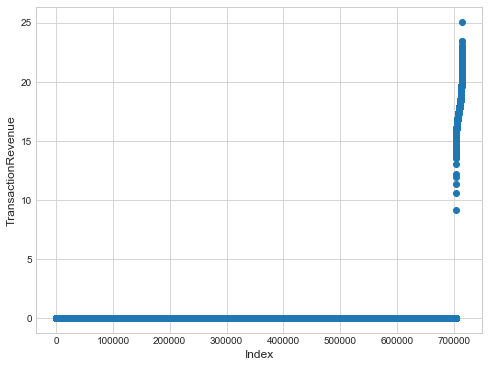

In [69]:
df_train_clean["totals.transactionRevenue"] = df_train_clean["totals.transactionRevenue"].astype('float')
group_id_rev = df_train_clean.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(group_id_rev.shape[0]), np.sort(np.log1p(group_id_rev["totals.transactionRevenue"].values)))
plt.xlabel('Index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

For most businesses - Only a small percentage of customers produce most of the revenue (80/20 rule)

In [71]:
non_zero_rev_train = (df_train_clean['totals.transactionRevenue'] > 0).sum()
non_zero_rev_group = (group_id_rev['totals.transactionRevenue'] > 0).sum()
print("Number of instances in training set with non-zero revenue : {} and percentage is : {:.4f}%".format(non_zero_rev_train, 
                                                                                                      (non_zero_rev_train / df_train_clean.shape[0])*100))
print("Number of unique customers with non-zero revenue : {} and percentage is : {:.4f}%".format(non_zero_rev_group, 
                                                                                                (non_zero_rev_group / group_id_rev.shape[0])*100))

Number of instances in training set with non-zero revenue : 11515 and percentage is : 1.2743%
Number of unique customers with non-zero revenue : 9996 and percentage is : 1.3997%


The ratio with revenue (> 0) is way more lesser than the 80/20 rule (which is 20%)

### Distribution of the target variable
- target => Natural log of the sum of all transactions revenue per user

In [73]:
target = np.log1p(df_train_clean.groupby("fullVisitorId")["totals.transactionRevenue"].sum())

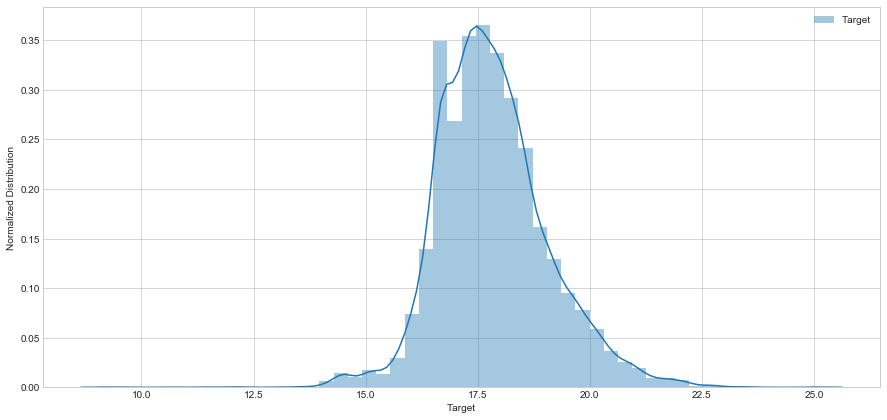

In [87]:
plt.subplots(figsize=(15,7))
sns.distplot(target[target != 0], label='Target').legend()
plt.xlabel('Target')
plt.ylabel('Normalized Distribution')
plt.show()

## Let's <span class="girk"><span class="mark">explore each **Categorical Variables** one by one</span></span> 

In [88]:
df_train_clean.head()

,channelGrouping,date,year,month,day,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,2016-08-01,2016,8,1,1492602573213666603,1470044332,1.0,1.470044e+09,Chrome,desktop,0,Macintosh,not available in demo dataset,Asia,Japan,not available in demo dataset,i3-systems.net,not available in demo dataset,Eastern Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
1,Direct,2016-08-01,2016,8,1,7394165545362887055,1470044425,3.0,1.470044e+09,Chrome,desktop,0,Windows,Hanoi,Asia,Vietnam,(not set),unknown.unknown,Hanoi,Southeast Asia,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
2,Referral,2016-08-01,2016,8,1,6107229716178617930,1470094529,1.0,1.470095e+09,Chrome,desktop,0,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,missing,referral,/,mall.googleplex.com
3,Direct,2016-08-01,2016,8,1,9459384188253198762,1470079413,1.0,1.470079e+09,Chrome,desktop,0,Windows,not available in demo dataset,Americas,Brazil,not available in demo dataset,brasiltelecom.net.br,not available in demo dataset,South America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
4,Direct,2016-08-01,2016,8,1,4052177266351383392,1470111093,1.0,1.470111e+09,Safari,desktop,0,Macintosh,not available in demo dataset,Asia,Thailand,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)


In [105]:
# check what categorical variables we have
df_train_clean.select_dtypes(include='object').columns.tolist()

['channelGrouping',
 'fullVisitorId',
 'device.browser',
 'device.deviceCategory',
 'device.operatingSystem',
 'geoNetwork.city',
 'geoNetwork.continent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'geoNetwork.subContinent',
 'trafficSource.adContent',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.adwordsClickInfo.page',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.campaign',
 'trafficSource.isTrueDirect',
 'trafficSource.keyword',
 'trafficSource.medium',
 'trafficSource.referralPath',
 'trafficSource.source']

In [138]:
# Define a function to plot the count of categorical variables (in ratio)
# Credit: https://www.kaggle.com/sz8416/lb-1-4439-gacr-prediction-eda-lgb-baseline
def plot_categorical(data, col, size=[15, 5], xlabel_angle=0, title='', max_cat = None):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts() / len(data)
    if max_cat != None:   # if there is maximum number of variables (coz too many variables)
        plotdata = plotdata[max_cat[0]:max_cat[1]]
    plt.figure(figsize = size)
    ax = sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title, fontsize=15)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    ax.set_xticklabels(data[col].value_counts().index.tolist(), fontsize=11)
    plt.ylabel('Ratio', fontsize=15)
    plt.show()

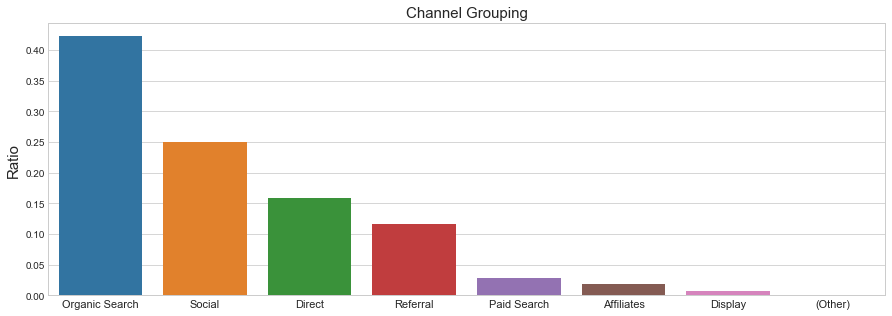

In [142]:
plot_categorical(data=df_train_clean, col='channelGrouping', xlabel_angle=0, title='Channel Grouping', max_cat=[0, 10])

### Device 

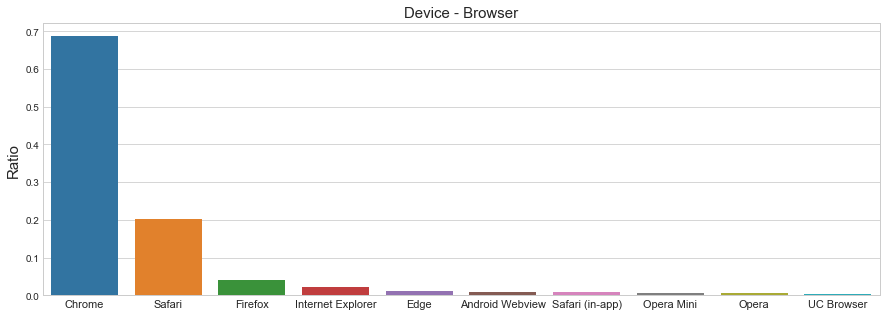

In [144]:
plot_categorical(data=df_train_clean, col='device.browser', xlabel_angle=0, title='Device - Browser', max_cat=[0, 10])

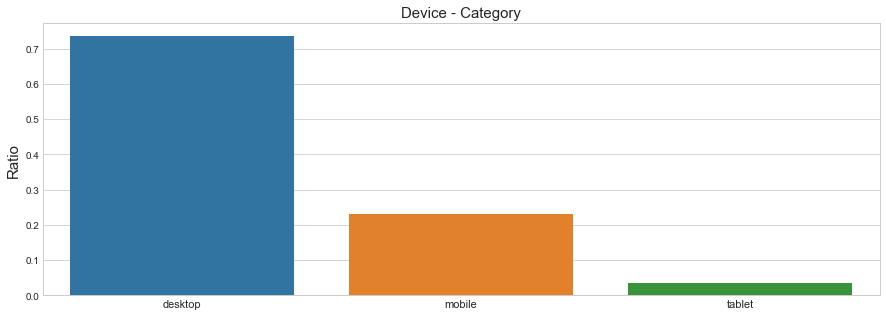

In [146]:
plot_categorical(data=df_train_clean, col='device.deviceCategory', xlabel_angle=0, title='Device - Category', max_cat=[0, 10])

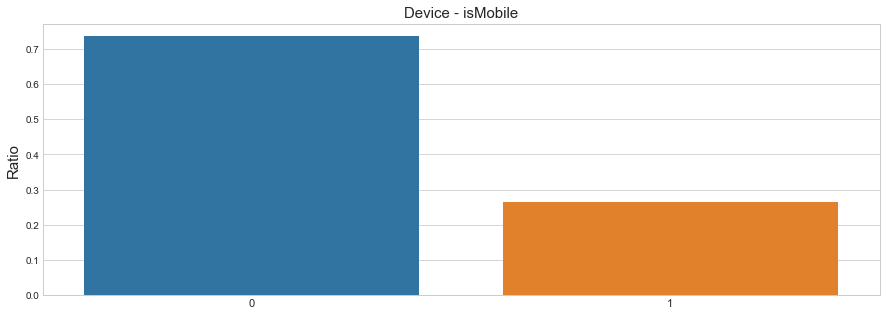

In [238]:
plot_categorical(data=df_train_clean, col='device.isMobile', xlabel_angle=0, title='Device - isMobile', max_cat=[0, 10])

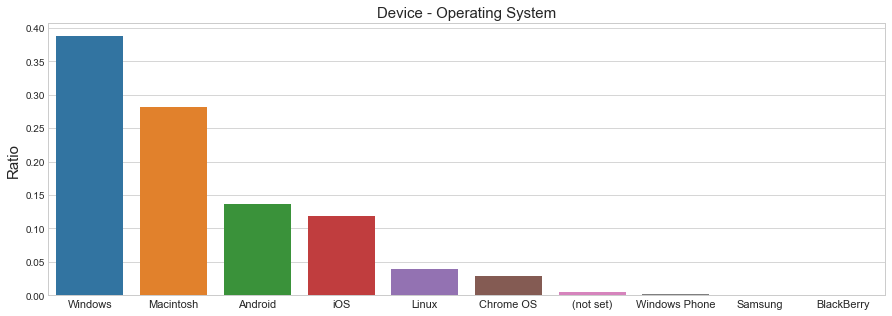

In [147]:
plot_categorical(data=df_train_clean, col='device.operatingSystem', xlabel_angle=0, title='Device - Operating System', max_cat=[0, 10])

### GeoNetwork

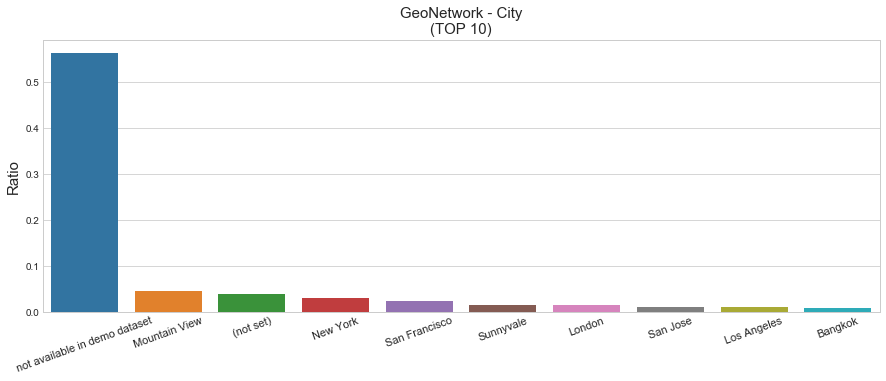

In [234]:
plot_categorical(data=df_train_clean, col='geoNetwork.city', xlabel_angle=20, title='GeoNetwork - City\n(TOP 10)', max_cat=[0, 10])


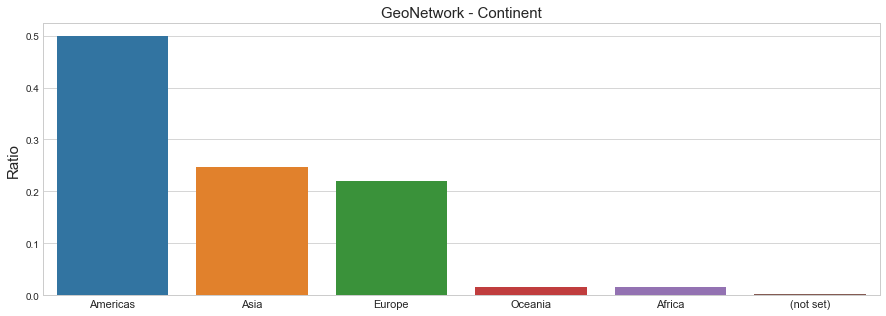

In [150]:
plot_categorical(data=df_train_clean, col='geoNetwork.continent', xlabel_angle=0, title='GeoNetwork - Continent', max_cat=[0, 10])

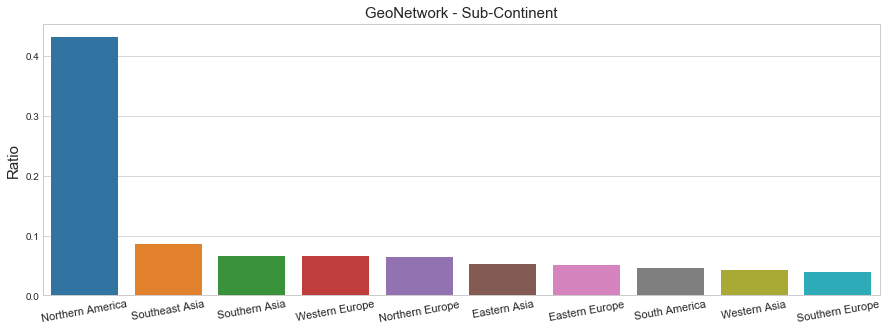

In [163]:
plot_categorical(data=df_train_clean, col='geoNetwork.subContinent', xlabel_angle=10, title='GeoNetwork - Sub-Continent', max_cat=[0, 10])

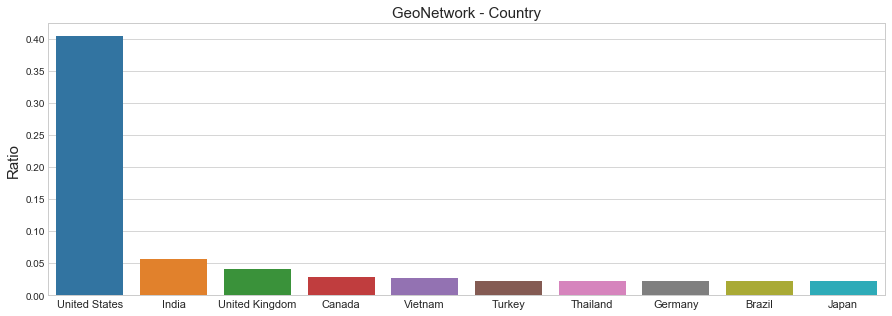

In [154]:
plot_categorical(data=df_train_clean, col='geoNetwork.country', xlabel_angle=0, title='GeoNetwork - Country', max_cat=[0, 10])

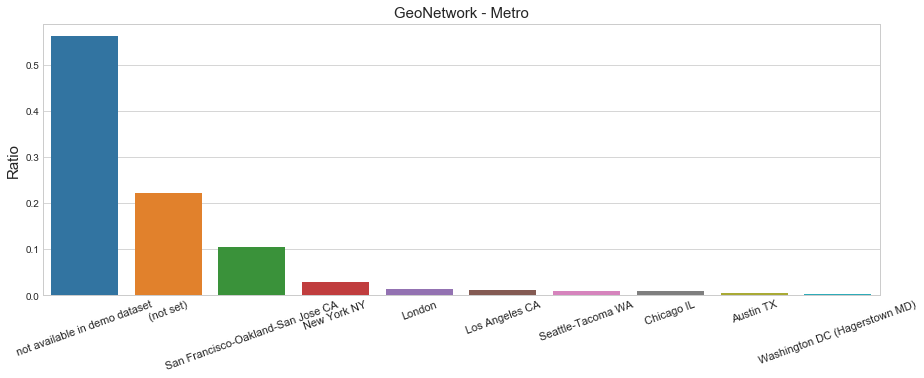

In [157]:
plot_categorical(data=df_train_clean, col='geoNetwork.metro', xlabel_angle=20, title='GeoNetwork - Metro', max_cat=[0, 10])

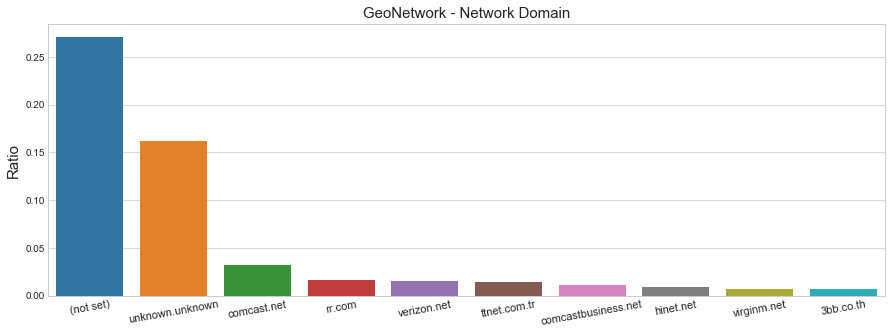

In [159]:
plot_categorical(data=df_train_clean, col='geoNetwork.networkDomain', xlabel_angle=10, title='GeoNetwork - Network Domain', max_cat=[0, 10])

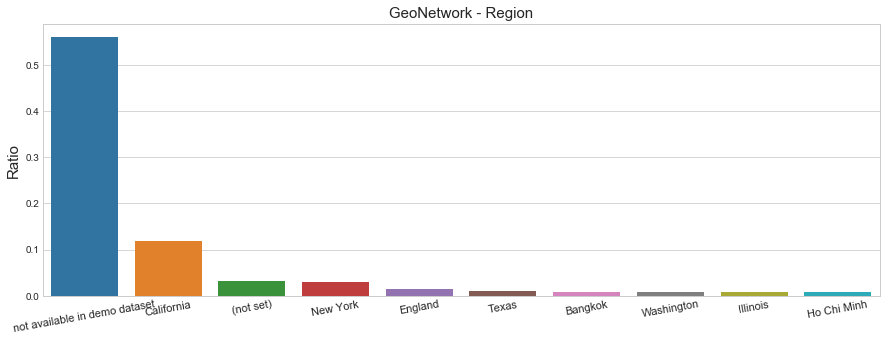

In [161]:
plot_categorical(data=df_train_clean, col='geoNetwork.region', xlabel_angle=10, title='GeoNetwork - Region', max_cat=[0, 10])

### Traffice Source

In [167]:
df_train_clean['trafficSource.adContent'].value_counts()

missing                                        892707
Google Merchandise Collection                    5122
Google Online Store                              1245
Display Ad created 3/11/14                        967
Full auto ad IMAGE ONLY                           822
Ad from 12/13/16                                  610
Ad from 11/3/16                                   489
Display Ad created 3/11/15                        392
{KeyWord:Google Brand Items}                      251
{KeyWord:Google Merchandise}                      155
Ad from 11/7/16                                   123
Google Merchandise                                 87
First Full Auto Template Test Ad                   87
20% discount                                       75
{KeyWord:Google Branded Gear}                      67
{KeyWord:Looking for Google Bags?}                 65
Swag with Google Logos                             64
Display Ad created 11/17/14                        50
{KeyWord:Want Google Sticker

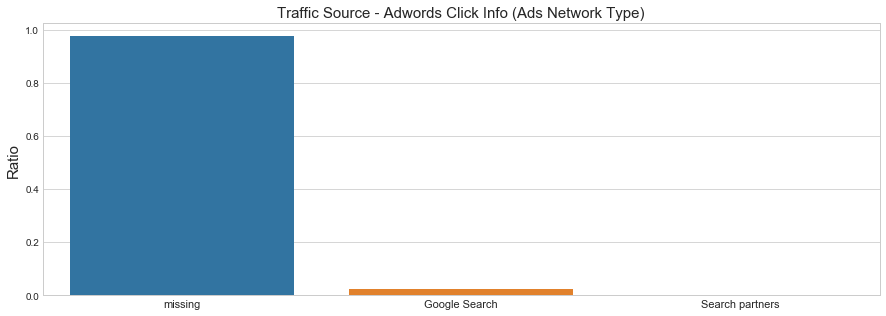

In [170]:
plot_categorical(data=df_train_clean, col='trafficSource.adwordsClickInfo.adNetworkType', xlabel_angle=0, title='Traffic Source - Adwords Click Info (Ads Network Type)', max_cat=[0, 10])

In [174]:
df_train_clean['trafficSource.adwordsClickInfo.gclId'].value_counts()

missing                                                                                         882092
Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3ZdwYO8GTsjiBFd5MPHStZa9y_9NCrI8X97oaAglc8P8HAQ          70
Cj0KEQjw1ee_BRD3hK6x993YzeoBEiQA5RH_BEA562M9tvl_mtnAFvtDnDqOQRp1RvxMMgwjcX1LAfwaAj4o8P8HAQ          41
CJH1vbf94M8CFUElgQodyakHgQ                                                                          29
Cj0KEQiAw_DEBRChnYiQ_562gsEBEiQA4LcssmB_RWgvpPnltzlzj5rGwqx5lk87wC5CjfcqzneNZewaAiAp8P8HAQ          27
CjwKEAiAj7TCBRCp2Z22ue-zrj4SJACG7SBEJui6ggr6ocA-eDC2-lX7W1m5IA1c_qNbzwZVTqUanxoCb5rw_wcB            24
CN_u9PaVhdACFcNahgodTCQAjw                                                                          22
CjwKEAiAxKrFBRDm25f60OegtwwSJABgEC-Z0_DLPcXHm1ZTqlR1YWeWXU875yaqwupt7pGMgFEZThoCeEzw_wcB            21
CjwKEAiAvs7CBRC24rao6bGCoiASJABaCt5DtalFxcoSsvr2E2adUhx6z6OE0KAuVtqKzl-BcVN1-hoCNlrw_wcB            20
CNHp7Nf2ytMCFVlWDQod_IoL5A                                               

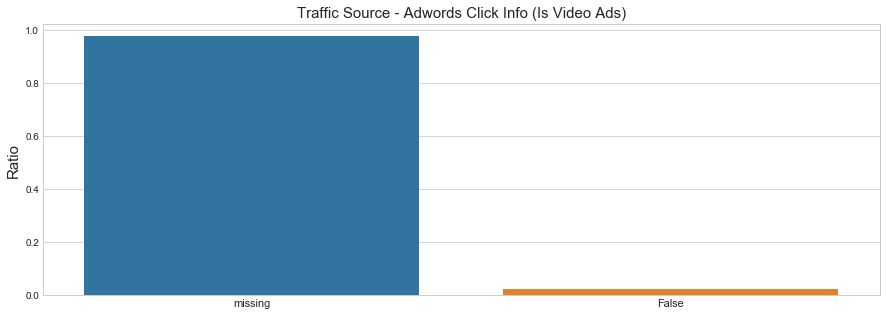

In [177]:
plot_categorical(data=df_train_clean, col='trafficSource.adwordsClickInfo.isVideoAd', xlabel_angle=0, title='Traffic Source - Adwords Click Info (Is Video Ads)', max_cat=[0, 10])

In [181]:
df_train_clean['trafficSource.adwordsClickInfo.page'].value_counts()

missing    882193
1.0         21362
2.0            73
3.0            10
5.0             7
7.0             3
9.0             2
4.0             2
14.0            1
Name: trafficSource.adwordsClickInfo.page, dtype: int64

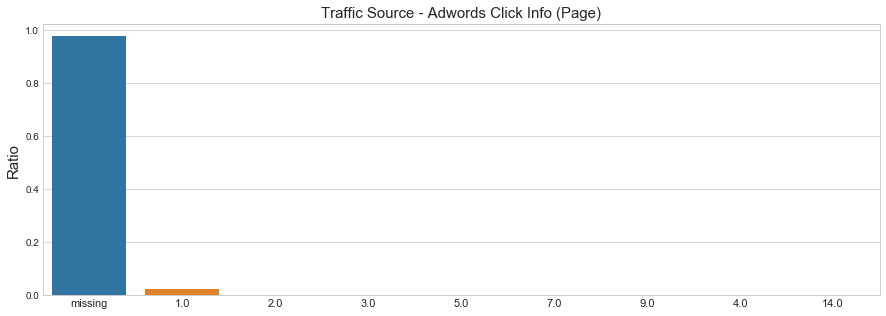

In [180]:
plot_categorical(data=df_train_clean, col='trafficSource.adwordsClickInfo.page', xlabel_angle=0, title='Traffic Source - Adwords Click Info (Page)', max_cat=[0, 10])

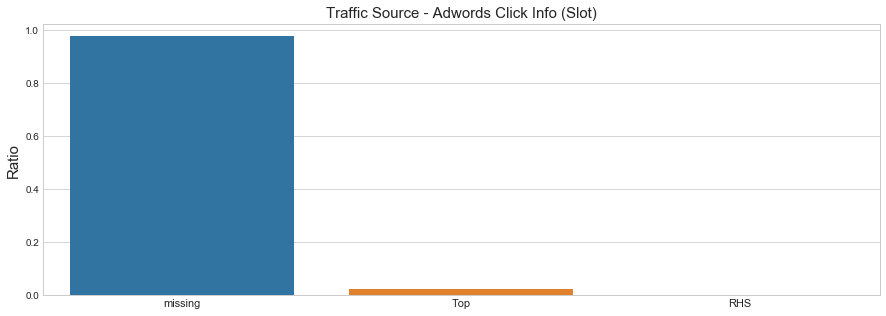

In [183]:
plot_categorical(data=df_train_clean, col='trafficSource.adwordsClickInfo.slot', xlabel_angle=0, title='Traffic Source - Adwords Click Info (Slot)', max_cat=[0, 10])

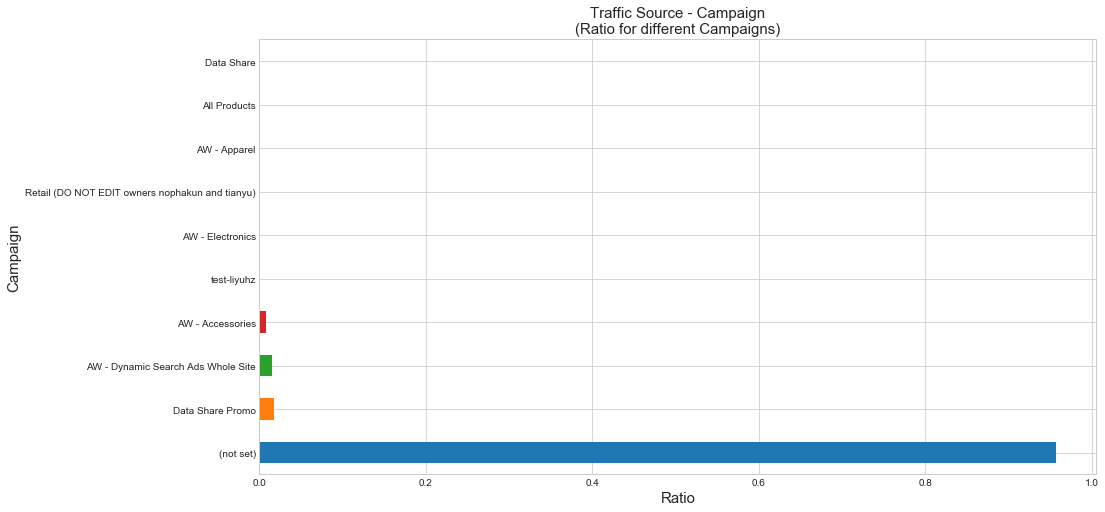

In [217]:
# with (not set)
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.campaign'].value_counts() / len(df_train_clean)
plotdata.plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Campaign', fontsize=15)
plt.title('Traffic Source - Campaign\n(Ratio for different Campaigns)', fontsize=15)
plt.show()

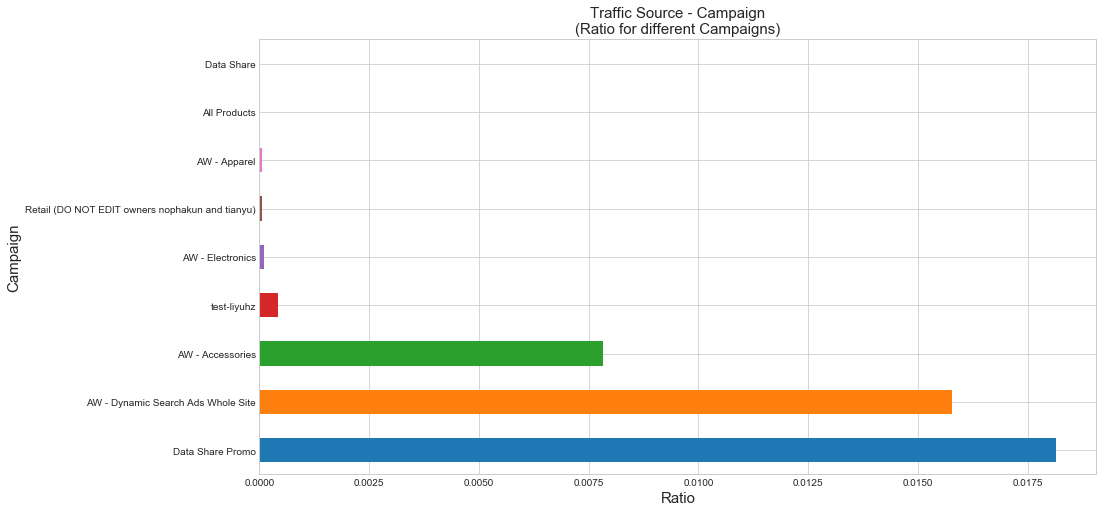

In [216]:
# without (not set)
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.campaign'].value_counts() / len(df_train_clean)
plotdata[1:].plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Campaign', fontsize=15)
plt.title('Traffic Source - Campaign\n(Ratio for different Campaigns)', fontsize=15)
plt.show()

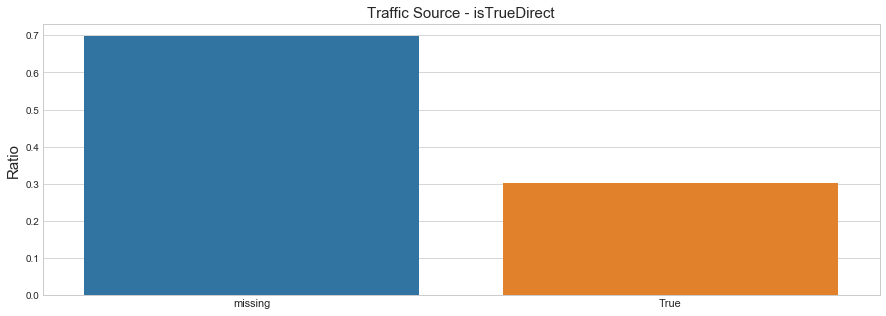

In [198]:
plot_categorical(data=df_train_clean, col='trafficSource.isTrueDirect', xlabel_angle=0, title='Traffic Source - isTrueDirect', max_cat=[0, 10])

In [202]:
# trafficSource.keyword
df_train_clean['trafficSource.keyword'].value_counts()

missing                                                                                                                                                502929
(not provided)                                                                                                                                         366363
6qEhsCssdK0z36ri                                                                                                                                        11503
(Remarketing/Content targeting)                                                                                                                          2298
1hZbAqLCbjwfgOH7                                                                                                                                         2264
google merchandise store                                                                                                                                 2209
Google Merchandise                                  

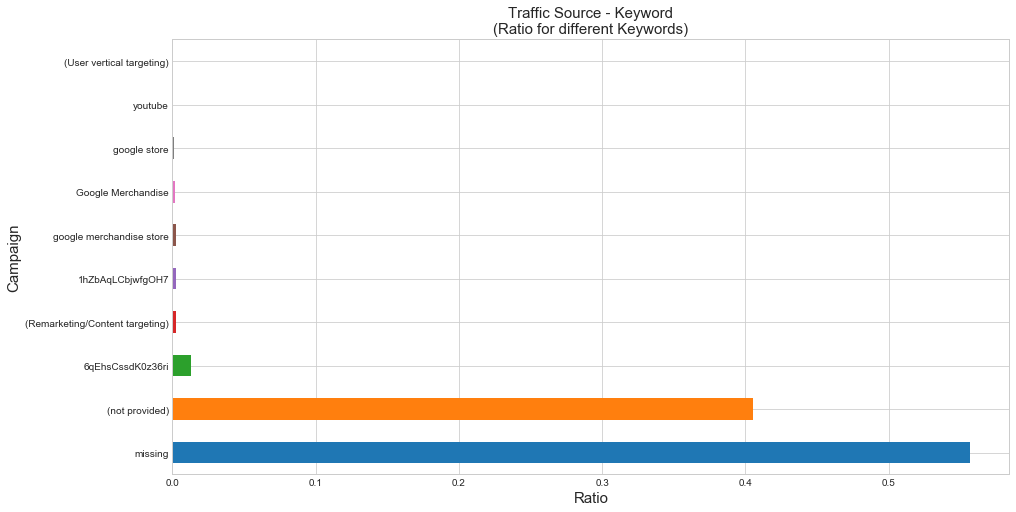

In [215]:
# with missing and (not provided)
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.keyword'].value_counts() / len(df_train_clean)
plotdata[:10].plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Campaign', fontsize=15)
plt.title('Traffic Source - Keyword\n(Ratio for different Keywords)', fontsize=15)
plt.show()

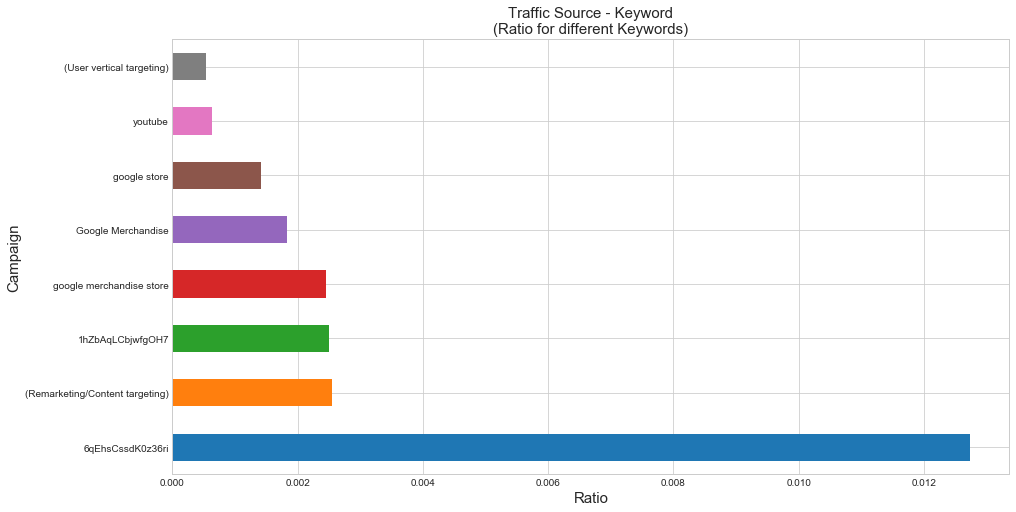

In [214]:
# with missing and (not provided)
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.keyword'].value_counts() / len(df_train_clean)
plotdata[2:10].plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Campaign', fontsize=15)
plt.title('Traffic Source - Keyword\n(Ratio for different Keywords)', fontsize=15)
plt.show()

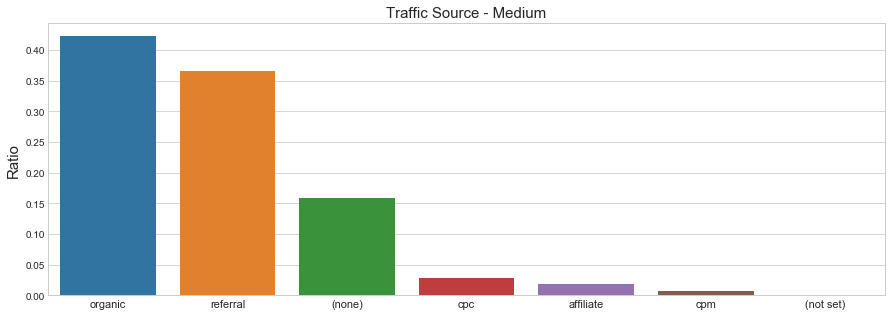

In [209]:
plot_categorical(data=df_train_clean, col='trafficSource.medium', xlabel_angle=0, title='Traffic Source - Medium', max_cat=[0, 10])

In [213]:
# trafficSource.referralPath
df_train_clean['trafficSource.referralPath'].value_counts()

missing                                                                                                                                                                                                                                                                           572712
/                                                                                                                                                                                                                                                                                  75523
/yt/about/                                                                                                                                                                                                                                                                         71036
/analytics/web/                                                                                                                                              

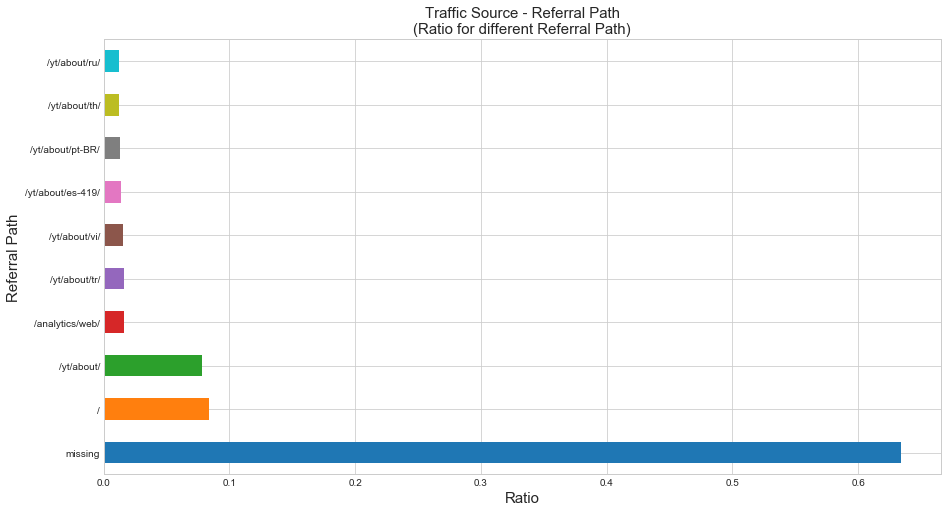

In [225]:
# with missing 
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.referralPath'].value_counts() / len(df_train_clean)
plotdata[:10].plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Referral Path', fontsize=15)
plt.title('Traffic Source - Referral Path\n(Ratio for different Referral Path)', fontsize=15)
plt.show()

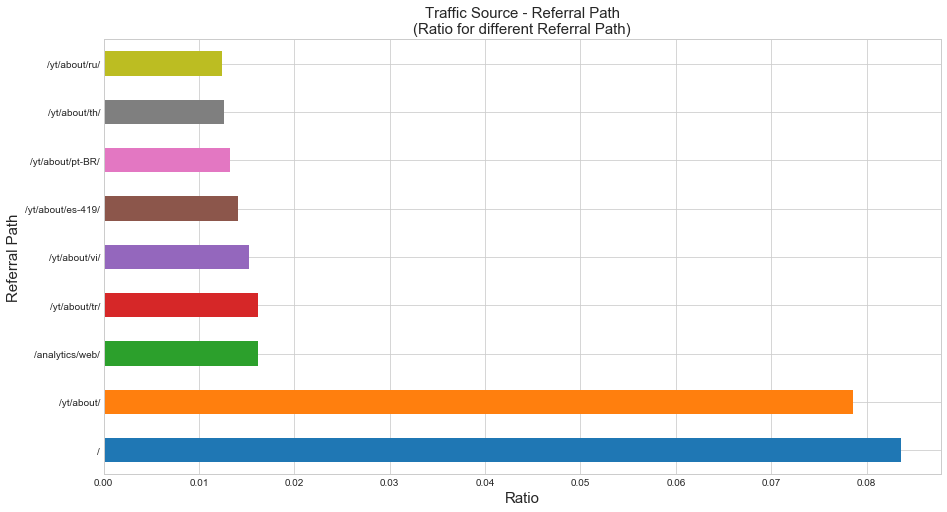

In [226]:
# without missing 
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.referralPath'].value_counts() / len(df_train_clean)
plotdata[1:10].plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Referral Path', fontsize=15)
plt.title('Traffic Source - Referral Path\n(Ratio for different Referral Path)', fontsize=15)
plt.show()

In [222]:
# trafficSource.source
df_train_clean['trafficSource.source'].value_counts()

google                                                          400788
youtube.com                                                     212602
(direct)                                                        143028
mall.googleplex.com                                              66416
Partners                                                         16411
analytics.google.com                                             16172
dfa                                                               5686
google.com                                                        4669
m.facebook.com                                                    3365
baidu                                                             3356
sites.google.com                                                  2983
facebook.com                                                      2296
siliconvalley.about.com                                           2097
reddit.com                                                        2022
qiita.

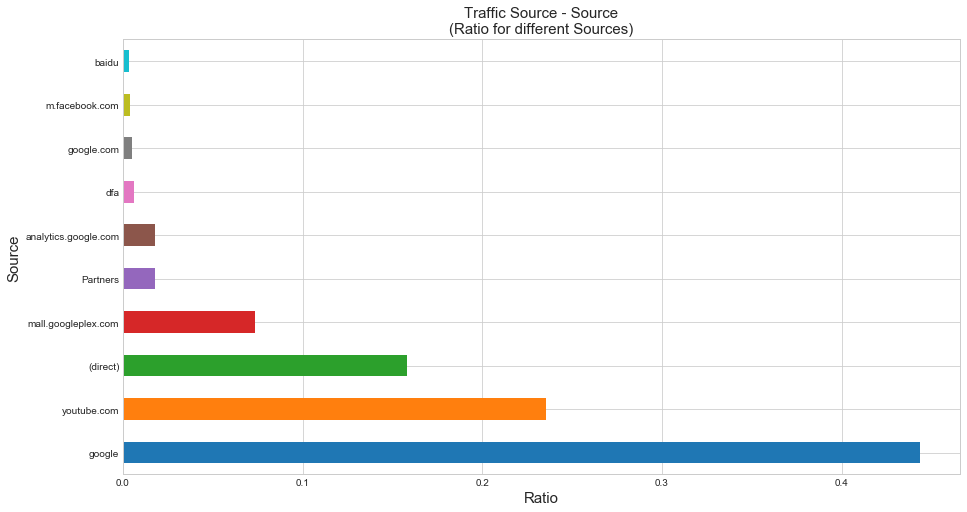

In [227]:
plt.subplots(figsize=(15,8))
plotdata = df_train_clean['trafficSource.source'].value_counts() / len(df_train_clean)
plotdata[:10].plot('barh')
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Source', fontsize=15)
plt.title('Traffic Source - Source\n(Ratio for different Sources)', fontsize=15)
plt.show()

## Let's <span class="mark">explore numerical variables one by one</span>

In [235]:
# check what numerical variables we have (device.isMobile already plotted before)
df_train_clean.select_dtypes(include=['float64', 'int32', 'int64']).columns.tolist()

['year',
 'month',
 'day',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.isMobile',
 'totals.bounces',
 'totals.hits',
 'totals.newVisits',
 'totals.pageviews',
 'totals.transactionRevenue']

### Totals

In [237]:
df_train_clean['totals.bounces'].value_counts()

0.0    453023
1.0    450630
Name: totals.bounces, dtype: int64

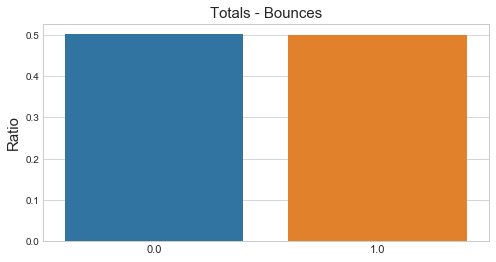

In [236]:
plot_categorical(data=df_train_clean, col='totals.bounces', size=[8 ,4], xlabel_angle=0, title='Totals - Bounces')

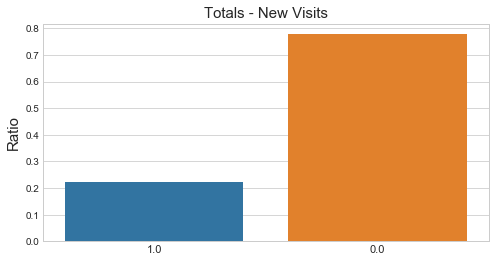

In [240]:
plot_categorical(data=df_train_clean, col='totals.newVisits', size=[8 ,4], xlabel_angle=0, title='Totals - New Visits')

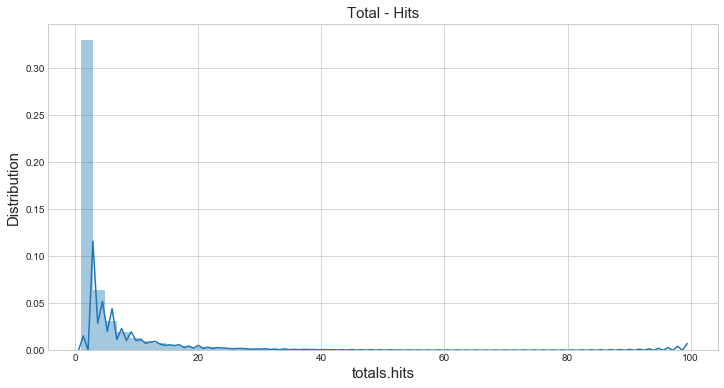

In [258]:
plt.figure(figsize=[12, 6])
sns.distplot(df_train_clean['totals.hits'][df_train_clean['totals.hits'] < 100])
plt.xlabel('totals.hits', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.title('Total - Hits', fontsize=15)
plt.show()

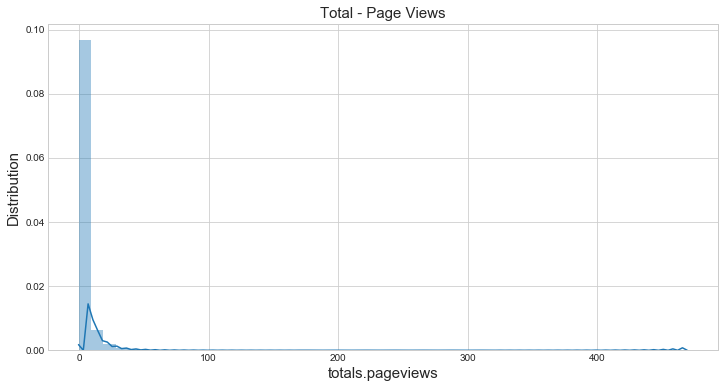

In [257]:
plt.figure(figsize=[12, 6])
sns.distplot(df_train_clean['totals.pageviews'])
plt.xlabel('totals.pageviews', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.title('Total - Page Views', fontsize=15)
plt.show()

### Date

In [268]:
df_train_clean.head()

,channelGrouping,date,yearmonth,year,month,day,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,20160801,201608,2016,8,1,1492602573213666603,1470044332,1.0,1.470044e+09,Chrome,desktop,0,Macintosh,not available in demo dataset,Asia,Japan,not available in demo dataset,i3-systems.net,not available in demo dataset,Eastern Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
1,Direct,20160801,201608,2016,8,1,7394165545362887055,1470044425,3.0,1.470044e+09,Chrome,desktop,0,Windows,Hanoi,Asia,Vietnam,(not set),unknown.unknown,Hanoi,Southeast Asia,1.0,1.0,0.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
2,Referral,20160801,201608,2016,8,1,6107229716178617930,1470094529,1.0,1.470095e+09,Chrome,desktop,0,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),missing,missing,referral,/,mall.googleplex.com
3,Direct,20160801,201608,2016,8,1,9459384188253198762,1470079413,1.0,1.470079e+09,Chrome,desktop,0,Windows,not available in demo dataset,Americas,Brazil,not available in demo dataset,brasiltelecom.net.br,not available in demo dataset,South America,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)
4,Direct,20160801,201608,2016,8,1,4052177266351383392,1470111093,1.0,1.470111e+09,Safari,desktop,0,Macintosh,not available in demo dataset,Asia,Thailand,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,0.0,missing,missing,missing,missing,missing,missing,(not set),True,missing,(none),missing,(direct)


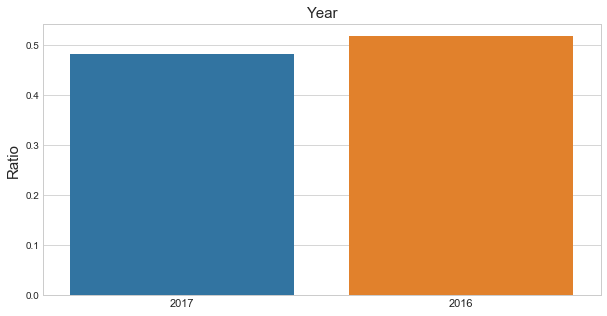

In [260]:
# year
plot_categorical(data=df_train_clean, col='year', size=[10, 5], xlabel_angle=0, title='Year')

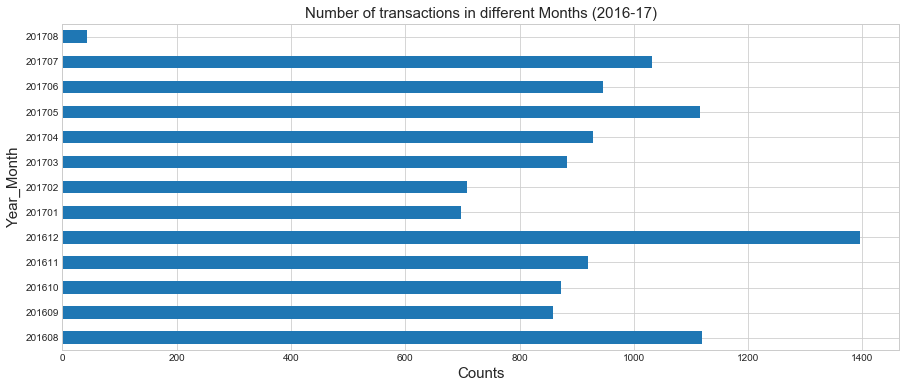

In [281]:
plt.figure(figsize=[12, 6])
df_train_clean[df_train_clean['totals.transactionRevenue'] > 0].yearmonth.value_counts().sort_index().plot('barh',color=color[0],figsize=(15,6))
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Year_Month', fontsize=15)
plt.title('Number of transactions in different Months (2016-17)', fontsize=15)
plt.show()

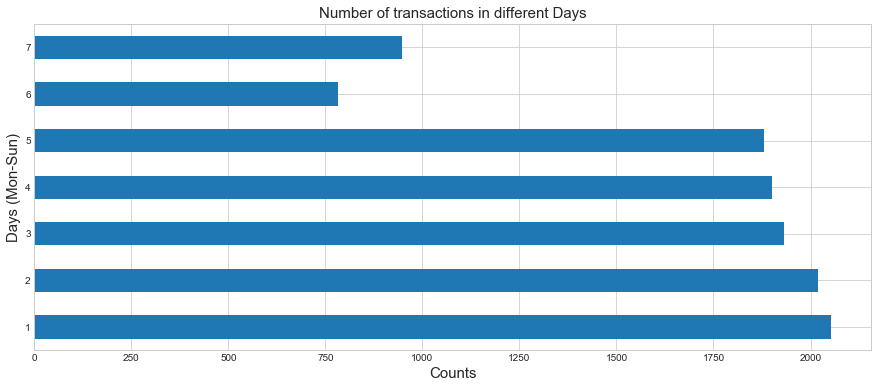

In [283]:
plt.figure(figsize=[12, 6])
df_train_clean[df_train_clean['totals.transactionRevenue'] > 0].day.value_counts().sort_index().plot('barh',color=color[0],figsize=(15,6))
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Days (Mon-Sun)', fontsize=15)
plt.title('Number of transactions in different Days', fontsize=15)
plt.show()

# Perform <span class="girk"><span class="burk">Label Encoding</span></span> on Categorical Variables
**Replace NaN with 'missing**

**WHY Label Encoding?**
- Since the models that will be used here are tree-based models, we can use Label Encoding and the models will find the best splits
- One Hot Encoding can cause the number of columns to expand greatly and slow down model training process

In [156]:
# specify which categorical variables to do label encoding
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']

# Loop through each categorical column
for col in cat_cols:
    label_encoder = LabelEncoder()
    # use the label encoding based on training and testing data to capture all strings
    label_encoder.fit(list(df_train_clean[col].values.astype('str')) + list(df_test_clean[col].values.astype('str')))
    df_train_clean[col] = label_encoder.transform(list(df_train_clean[col].values.astype('str')))
    df_test_clean[col] = label_encoder.transform(list(df_test_clean[col].values.astype('str')))
    print('Label encoded: {}'.format(col))

Label encoded: channelGrouping
Label encoded: device.browser
Label encoded: device.deviceCategory
Label encoded: device.operatingSystem
Label encoded: geoNetwork.city
Label encoded: geoNetwork.continent
Label encoded: geoNetwork.country
Label encoded: geoNetwork.metro
Label encoded: geoNetwork.networkDomain
Label encoded: geoNetwork.region
Label encoded: geoNetwork.subContinent
Label encoded: trafficSource.adContent
Label encoded: trafficSource.adwordsClickInfo.adNetworkType
Label encoded: trafficSource.adwordsClickInfo.gclId
Label encoded: trafficSource.adwordsClickInfo.page
Label encoded: trafficSource.adwordsClickInfo.slot
Label encoded: trafficSource.campaign
Label encoded: trafficSource.keyword
Label encoded: trafficSource.medium
Label encoded: trafficSource.referralPath
Label encoded: trafficSource.source
Label encoded: trafficSource.adwordsClickInfo.isVideoAd
Label encoded: trafficSource.isTrueDirect
